In [16]:
import pickle
import numpy as np
import numpy as np
import cv2
import torch
from torch import nn
import matplotlib.pyplot as plt

In [17]:
MODEL_PATH = "../trained_models/watches_acc_96"

In [21]:
from PIL import Image
import numpy as np
import cv2
def predict(image,encoder,transforms = None,inv_normalize = None):
    model = torch.load(MODEL_PATH + '/model.pth')
    model.eval()
    if(isinstance(image,np.ndarray)):
      image = Image.fromarray(image)
    if(transforms!=None):
        image = transforms(image)
    data = image.expand(1,-1,-1,-1)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data = data.type(torch.FloatTensor).to(device)
    sm = nn.Softmax(dim = 1)
    output = model(data)
    output = sm(output)
    _, preds = torch.max(output, 1)
    img_plot(image,inv_normalize)
    prediction_bar(output,encoder)

    pred_label = encoder[preds.cpu().detach().numpy()[0]]
    return pred_label
def prediction_bar(output,encoder):
    output = output.cpu().detach().numpy()
    a = output.argsort()
    a = a[0]
    
    size = len(a)
    if(size>5):
        a = np.flip(a[-5:])
    else:
        a = np.flip(a[-1*size:])
    prediction = list()
    clas = list()
    for i in a:
      prediction.append(float(output[:,i]*100))
      clas.append(str(i))
    for i in a:
        print('Class: {} , confidence: {}'.format(encoder[int(i)],float(output[:,i]*100)))
    plt.bar(clas,prediction)
    plt.title("Confidence score bar graph")
    plt.xlabel("Confidence score")
    plt.ylabel("Class number")
 
def img_plot(image,inv_normalize = None):
    if(inv_normalize!=None):
        image = inv_normalize(image)
    image = image.cpu().numpy().transpose(1,2,0)
    plt.imshow(image)
    plt.show()


In [22]:
with open(MODEL_PATH + "/bin/encoder.pickle", 'rb') as fr:
    encoder = pickle.load(fr)
with open(MODEL_PATH + "/bin/test_transforms.pickle", 'rb') as fr:
    test_transforms = pickle.load(fr)
with open(MODEL_PATH + "/bin/inv_normalize.pickle", 'rb') as fr:
    inv_normalize = pickle.load(fr)

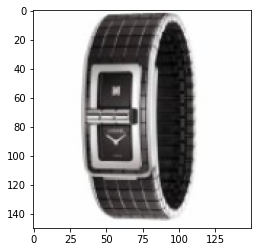

Class: watch_codecoco , confidence: 86.25550842285156
Class: watch_J12 , confidence: 6.725770950317383
Class: watch_premiere , confidence: 5.737141132354736
Class: watch_boyfriend , confidence: 1.2815755605697632


TypeError: 'dict' object is not callable

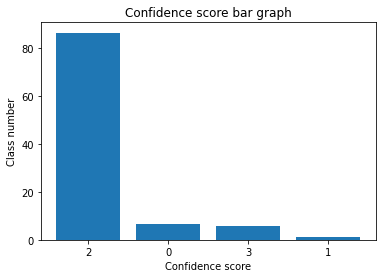

In [24]:
image = cv2.imread('../sample_images/watch_codecoco.jpg')
pred = predict(image,encoder,test_transforms,inv_normalize)